## SI epidemic simulations: mean infection time vs distance from central initial infected node

In [1]:
import networkx as nx
import EoN

import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TAU = 0.01
TMAX = 10

In [3]:
# Import Reddit Hyperlink network
edges = np.loadtxt('data/edges.csv', delimiter=',', dtype=int, skiprows=1)
G = nx.Graph()
G.add_edges_from(edges)

### Define functions for simulation and plotting

In [4]:
def simulate_si(G: nx.Graph, tau: float, tmax: float, initial_infected: int, nruns: int) -> dict[int, dict[str, float]]:
    """Simulates SI epidemic nruns times on graph G with infection rate tau and initial infected node initial_infected. Returns a dictionary which contains, for each node, its distance from the initial infected node and its mean infection time."""

    # Compute shortest path lengths from initial_infected to all other nodes
    # `distances` contains all nodes that are reachable from initial_infected
    distances = nx.shortest_path_length(G, source=initial_infected)

    # Initialise dictionary to store distance and infection times for each node
    node_distance_time = {node: {'distance': distances[node], 'time': []} for node in distances}

    # Run SI simulation nruns times
    for run in range(nruns):
        sim = EoN.fast_SIR(G, tau, gamma=0, tmax=tmax, initial_infecteds=initial_infected, return_full_data=True)

        # Record infection time for each infected node
        for node in distances:
            if 'I' in (node_history := sim.node_history(node))[1]:
                node_distance_time[node]['time'].append(node_history[0][node_history[1].index('I')])
            # else:
            #     print(f'Node {node} was never infected in run {run}.')
    
    # Filter out nodes that were never infected
    node_distance_time = {k: v for k, v in node_distance_time.items() if v['time']}

    # Compute mean infection time for each node
    for node in node_distance_time:
        node_distance_time[node]['time'] = np.mean(node_distance_time[node]['time'])

    return node_distance_time

In [5]:
def plot_distance_time(node_distance_time: dict[int, dict[str, float]], initial_infected_id: int, initial_infected_name: str, save=False) -> None:
    """Plots the mean infection time of each node as a function of its distance from the initial infected node."""

    # Create lists of distances and times
    distances = [node_distance_time[node]['distance'] for node in node_distance_time]
    times = [node_distance_time[node]['time'] for node in node_distance_time]

    # Plot time as a function of distance
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.scatter(distances, times, marker='x')
    ax.set_title(f'Initial infected node: {initial_infected_name} (id={initial_infected_id})')
    ax.set_xlabel('Distance from initial infected node')
    ax.set_ylabel('Mean infection time')

    # Add text box showing total number of infected nodes
    total_infected = len(node_distance_time)
    ax.text(0.04, 0.95, f"Total infected: {total_infected}",
            transform=ax.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Jank - manually set axis limits to emulate shared axis
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(0 - (TMAX * 1.2) * 0.025, (TMAX * 1.2) * 1.025)
    
    # Save figure
    if save:
        fig.savefig(f"results/task2/{initial_infected_name.replace(' ', '_')}.png", dpi=fig.dpi, bbox_inches='tight')

    plt.show()

### Eigenvector centrality

In [6]:
# Import node eigenvector centralities
with open('data/eigenvector_centrality.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    node_eigenvector = {int(row[0]): float(row[1]) for row in reader}

Max eigenvector node: (59, 0.19980016082723698)
Total number of infected nodes: 15925


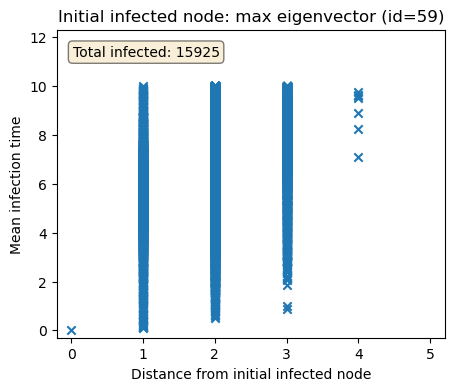

In [7]:
# Find node with highest eigenvector centrality
max_eigenvector_node = max(node_eigenvector, key=node_eigenvector.get)
print(f'Max eigenvector node: {(max_eigenvector_node, node_eigenvector[max_eigenvector_node])}')

# Simulate SI epidemic with max eigenvector node as initial infected node
node_distance_time = simulate_si(G, tau=TAU, tmax=TMAX, initial_infected=max_eigenvector_node, nruns=10)

# Print total number of infected nodes
print(f"Total number of infected nodes: {len(node_distance_time)}")

# Plot mean infection time as a function of distance from initial infected node
plot_distance_time(node_distance_time, max_eigenvector_node, 'max eigenvector', save=True)

Min eigenvector node: (858, 1.5684687372311454e-20)
Total number of infected nodes: 1


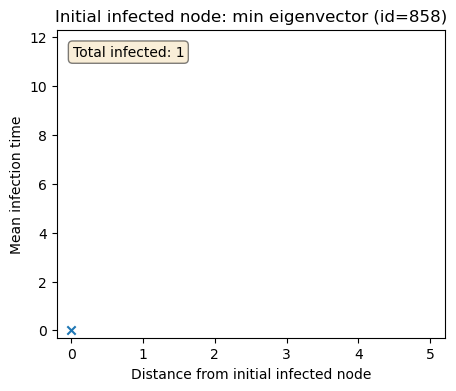

In [8]:
# Find node with lowest eigenvector centrality
min_eigenvector_node = min(node_eigenvector, key=node_eigenvector.get)
print(f'Min eigenvector node: {(min_eigenvector_node, node_eigenvector[min_eigenvector_node])}')

# Simulate SI epidemic with min eigenvector node as initial infected node
node_distance_time = simulate_si(G, tau=TAU, tmax=TMAX, initial_infected=min_eigenvector_node, nruns=10)

# Print total number of infected nodes
print(f"Total number of infected nodes: {len(node_distance_time)}")

# Plot mean infection time as a function of distance from initial infected node
plot_distance_time(node_distance_time, min_eigenvector_node, 'min eigenvector', save=True)

### Betweenness centrality

In [9]:
# Import node betweenness centralities
with open('data/betweenness_centrality.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    node_betweenness = {int(row[0]): float(row[1]) for row in reader}

Max betweenness node: (59, 0.11404735670207757)
Total number of infected nodes: 15634


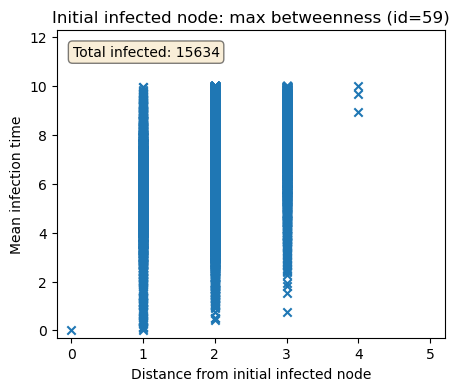

In [10]:
# Find node with highest betweenness centrality
max_betweenness_node = max(node_betweenness, key=node_betweenness.get)
print(f'Max betweenness node: {(max_betweenness_node, node_betweenness[max_betweenness_node])}')

# Simulate SI epidemic with max betweenness node as initial infected node
node_distance_time = simulate_si(G, tau=TAU, tmax=TMAX, initial_infected=max_betweenness_node, nruns=10)

# Print total number of infected nodes
print(f"Total number of infected nodes: {len(node_distance_time)}")

# Plot mean infection time as a function of distance from initial infected node
plot_distance_time(node_distance_time, max_betweenness_node, 'max betweenness', save=True)

Min betweenness node: (12, 0.0)
Total number of infected nodes: 1353


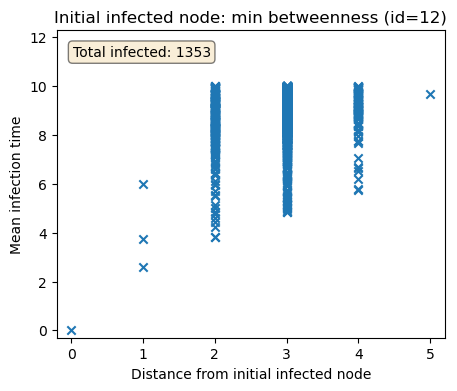

In [11]:
# Find node with lowest betweenness centrality
min_betweenness_node = min(node_betweenness, key=node_betweenness.get)
print(f'Min betweenness node: {(min_betweenness_node, node_betweenness[min_betweenness_node])}')

# Simulate SI epidemic with min betweenness node as initial infected node
node_distance_time = simulate_si(G, tau=TAU, tmax=TMAX, initial_infected=min_betweenness_node, nruns=10)

# Print total number of infected nodes
print(f"Total number of infected nodes: {len(node_distance_time)}")

# Plot mean infection time as a function of distance from initial infected node
plot_distance_time(node_distance_time, min_betweenness_node, 'min betweenness', save=True)

### Final result

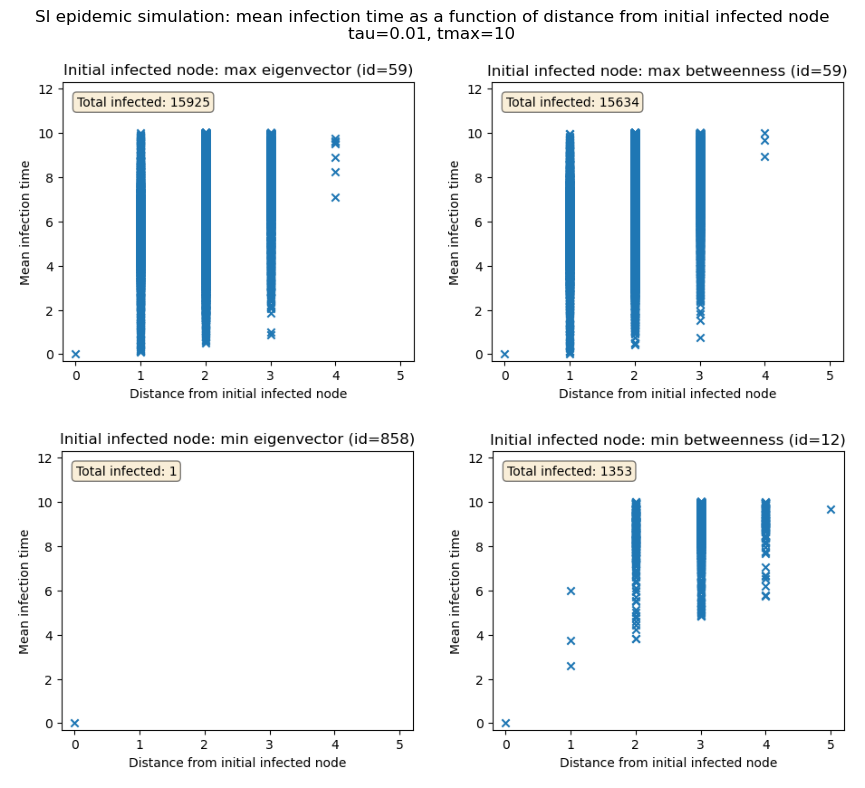

In [12]:
# Combine result plots into one figure
fig_max_eigenvector = plt.imread('results/task2/max_eigenvector.png')
fig_min_eigenvector = plt.imread('results/task2/min_eigenvector.png')
fig_max_betweenness = plt.imread('results/task2/max_betweenness.png')
fig_min_betweenness = plt.imread('results/task2/min_betweenness.png')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle(f'SI epidemic simulation: mean infection time as a function of distance from initial infected node\ntau={TAU}, tmax={TMAX}')

axes[0, 0].imshow(fig_max_eigenvector)
axes[0, 0].axis('off')
axes[1, 0].imshow(fig_min_eigenvector)
axes[1, 0].axis('off')
axes[0, 1].imshow(fig_max_betweenness)
axes[0, 1].axis('off')
axes[1, 1].imshow(fig_min_betweenness)
axes[1, 1].axis('off')

fig.tight_layout()
fig.subplots_adjust(wspace=-0.2)

# Save figure
fig.savefig('results/task2/combined.png', dpi=fig.dpi, bbox_inches='tight')

plt.show()